In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import norm

import matplotlib as mpl
mpl.rcParams.update({'font.size': 18})

from fold import *
from bayesian_fourier_series import *

%matplotlib inline

# Figure 3 
<img src="single_fold_proof_of_concept.svg">
Proof of concept 1-D example for a sinusoidal fold geometry. (a) Reference fold shape with a fold
wavelength of 150m and sample locations. (b) Reference fold profile and sample locations representing the
fold rotation angle for the fold geometry in (a). (c) S-Variogram for the structural observations (blue dots in
(a) and (b). The dots represent the variogram for all points at the corresponding step size. The red dots are
the locations identified as being local extrema. The estimated half wavelength is shown by the dashed line.
(d) Interpolated fold shape probability showing the range in solutions sampled with MCMC. (e) Fold rotation
angle profile probability sampled from the posterior using MCMC. (f) Violin plot showing prior and posterior
distributions for the fold wavelength.

In [2]:
#The x location of the data used in the paper has been saved in a numpy array, load this to reproduce the figures 
try:
    print "loading exisitng data"
    x = np.load('figure_2_x_location.npy')
except:
    x  = np.arange(0, 150,1)
    np.random.shuffle(x)
    N = 50 #number of sample locations
    x = x[:N]
    np.save('figure_3_x_location.npy',x)
    print "generating data"

loading exisitng data


In [3]:
wl2 = 150.
foldfourier2 = fourierFold(30,80,wl2,0,40,20,20)
x_ = np.linspace(0,300,300)


print len(x)

50


In [4]:
print "X locations and Y values for fold shape"
data = x[:],foldfourier2.pos(x)[:]
print data

X locations and Y values for fold shape
(array([ 24,  48, 106,   6, 124,  14,  56, 120,  65,   9,  44, 144,  53,
       116,  88,   0,  82, 117, 102,  10, 139,  37,   3,   4,   1, 118,
        55,  91,  96, 109, 126, 111,  93,  13, 141,  89,  87, 105,  95,
        26,  75, 134,  36,  97, 148, 131,   7,  18,  66, 133]), array([ 2.83737768e+01,  1.56844372e+02, -7.56495422e+01, -9.41531830e+01,
       -1.59467709e+02, -4.23117131e+01,  1.69802725e+02, -1.47344224e+02,
        1.61811286e+02, -7.56495422e+01,  1.43652648e+02, -1.50777307e+02,
        1.67124835e+02, -1.31093932e+02,  4.91754233e+01, -1.26437512e+02,
        8.81363148e+01, -1.35520369e+02, -4.91754233e+01, -6.92015439e+01,
       -1.63870991e+02,  1.11171972e+02, -1.11171972e+02, -1.05681123e+02,
       -1.21559278e+02, -1.39709057e+02,  1.69206418e+02,  2.83737768e+01,
       -7.12465901e+00, -9.41531830e+01, -1.63870991e+02, -1.05681123e+02,
        1.42368189e+01, -4.91754233e+01, -1.59467709e+02,  4.23117131e+01,
    

In [10]:
mixture = True
N = 20
x = x[:N]
fold= (foldfourier2.pos(x_))#+foldfourier.pos(x_)
foldpts = (foldfourier2.pos(x))#+foldfourier.pos(x)
x__ = x_
foldrot = np.arctan(np.gradient(fold))

foldrot*=180.0/np.pi

a = np.random.choice([1,1,1,1,1,1,1,1,1,1],N)

#add some noise to the x and y observations - simulate some uncertainty
for i in range(1):
    xx1, yy1 = shake_xy(x,foldrot[x]*a,5)
xm = np.array([20])
xv = x
data = DataSet(xv,foldfourier2.pos(xv),x,foldrot[x],xm,foldfourier2.pos(xm),foldrot[xm]) 
fourierseries = bayesian_fourier_series_model(xx1,yy1,1)
fourierseries.add_reference_foldshape(x_,fold)
fourierseries.add_reference_foldlocations(x,foldpts)
fourierseries.add_reference_foldprofile(x_,foldrot)
fourierseries.find_wavelength()
print fourierseries.wavelengths

0.0 164.16000000000003
[164.16000000000003]


In [11]:
fourierseries.setup_inference()
fourierseries.run_sampler(10000,5000)


 [-----------------100%-----------------] 10000 of 10000 complete in 11.9 sec

True

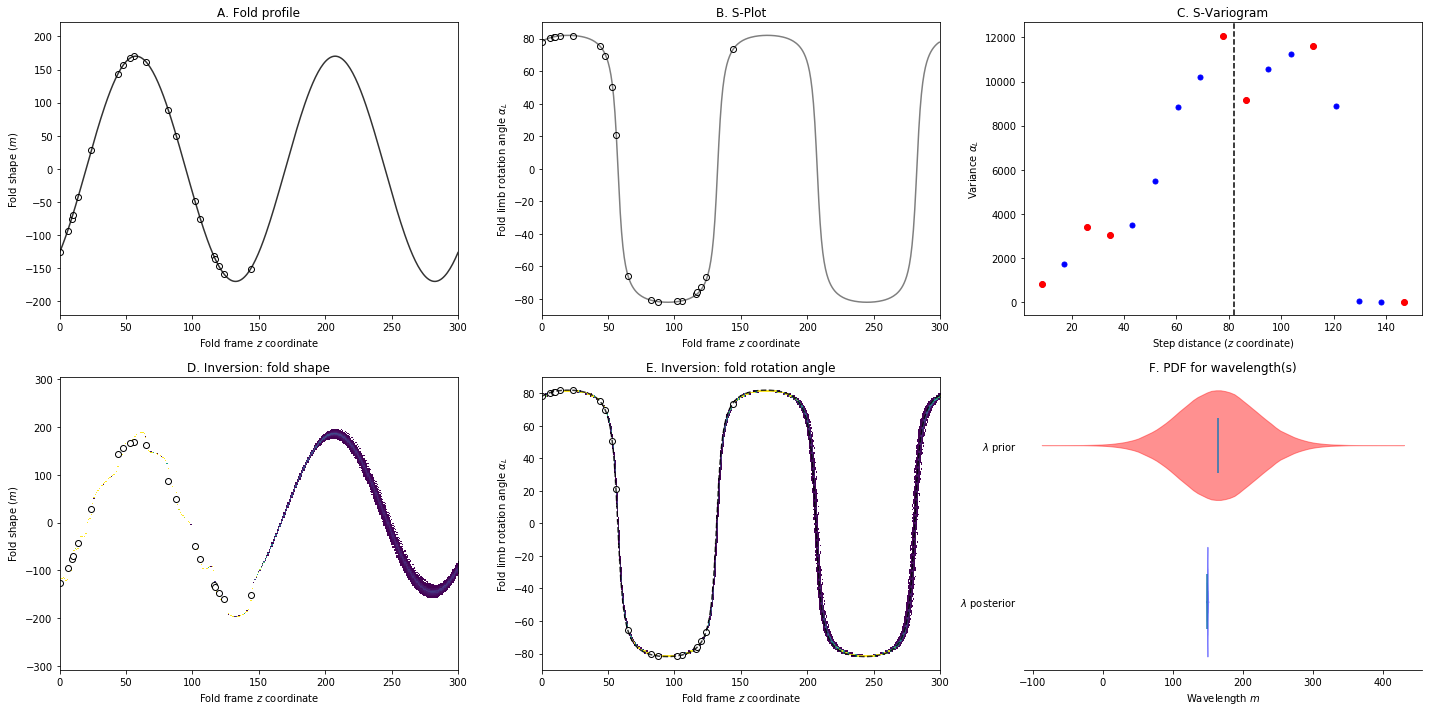

In [12]:
fig = bayesian_fourier_series_figure(fourierseries)
#fourierseries.semivariogram.
fig.plot_variogram()
fig.plot_reference_fold_points()
fig.plot_reference_fold_points('ko',0,1)
#fig.plot_reference_fold_shape('b-',0,1)

fig.plot_reference_fold_profile()
fig.plot_reference_fold_profile_points()
fig.plot_reference_fold_profile_points('ko',1,1)
#fig.plot_reference_fold_profile('b-',1,1)

fig.plot_reference_fold_shape()
fig.ax[0][0].set_title(r'A. Fold profile')
fig.ax[0][1].set_title(r'B. S-Plot')
fig.ax[0][2].set_title(r'C. S-Variogram')

fig.ax[1][1].set_title(r'E. Inversion: fold rotation angle')
fig.ax[1][0].set_title(r'D. Inversion: fold shape')
fig.ax[1][2].set_title(r'F. PDF for wavelength(s)')

fig.ax[0][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][2].set_xlabel(r'Step distance ($z$ coordinate)')

fig.ax[1][2].set_xlabel(r'Wavelength $m$')
#g.ax[1][2].set_ylabel(r'Probability')

fig.ax[0][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
fig.ax[0][2].set_ylabel(r'Variance $\alpha_L$')

fig.ax[1][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][0].set_ylabel(r'Fold shape ($m$)')
fig.ax[0][0].set_ylabel(r'Fold shape ($m$)')

fig.ax[1][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
H2 = fig.plot_curve_density(0,300)
fig.plot_fold_heat_map(data)#fig.fourier_series_model.reference_fold_y[0])

fig.plot_map(0,300,'k--')

colours = ['b-','r-']

temp = fig.ax[0][0]
i = 0

arrays = []
pos = []
labels = []
c = len(fourierseries.wavelengths)/2
for i in range(len(fourierseries.wavelengths)):
    arrays.append(np.random.normal(fourierseries.wavelengths[i],fourierseries.wavelengths[i]/3.,100000))
    labels.append(r"$\lambda$ prior")
    pos.append(c)
    c-=1
    arrays.append(fourierseries.S.trace('qw_%i'%i)[:][:])
    labels.append(r"$\lambda$ posterior")

    pos.append(c)
    c-=1
fig.plot_violin(1,2,labels,pos,arrays)
plt.tight_layout()
for i in range(2):
    for j in range(2):
        fig.ax[i][j].set_xlim(0,300)
fig.ax[1][2].spines['top'].set_visible(False)
fig.ax[1][2].spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
fig.ax[1][2].spines['left'].set_visible(False)
fig.ax[1][2].tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')

In [19]:
fig.fig.savefig("single_fold_proof_of_concept.svg")